In [42]:
import matplotlib
import pandas as pd
import seaborn as sns

results = pd.read_csv('./questionnaire-results.tsv', '\t')

In [43]:
# Functions to select entries with a given job from the dataset
# Choices in the questionnaire were :
# 'Architecte et développeur', 'Développeur', 'Architecte', 'Consultant'

def select_entries_with_job(results, selected_names, notin = False):
    results_with_job_in_selected_names = results[results.columns[2]].isin(selected_names)
    cond = ~results_with_job_in_selected_names if notin else results_with_job_in_selected_names
    return results.loc[cond]


def architects(results):
    return select_entries_with_job(results, ['Architecte'])

def developers(results):
    return select_entries_with_job(results, ['Développeur'])

def both_architect_and_developers(results):
    return select_entries_with_job(results, ['Architecte et développeur', 'CTO'])

def consultants(results):
    return select_entries_with_job(results, ['Consultant', 'Consultant architecte'])

def other_jobs(results):
    return select_entries_with_job(results, ['Architecte et développeur', 'CTO', 'Développeur', 'Architecte', 'Consultant', 'Consultant architecte'], True)

In [44]:
# Functions to select entries with a given number of VM from the dataset
# Choices in the questionnaire were :
# 'Moins de 100', 'Entre 100 et 500', 'Entre 500 et 1000', 'Entre 1000 et 3000', 'Plus de 3000', 'Je ne sais pas'

def select_entries_with_vm(results, number_of_vm, notin = False):
    results_with_selected_number_of_vm = results[results.columns[4]] == number_of_vm
    cond = ~results_with_selected_number_of_vm if notin else results_with_selected_number_of_vm
    return results.loc[cond]


def lt_100_vm(results):
    return select_entries_with_vm(results, 'Moins de 100')

def bt_100_and_500_vm(results):
    return select_entries_with_vm(results, 'Entre 100 et 500')

def bt_500_and_1000_vm(results):
    return select_entries_with_vm(results, 'Entre 500 et 1000')

def bt_1000_and_3000_vm(results):
    return select_entries_with_vm(results, 'Entre 1000 et 3000')

def mt_3000_vm(results):
    return select_entries_with_vm(results, 'Plus de 3000')

def dont_know_vm(results):
    return select_entries_with_vm(results, 'Je ne sais pas')

In [291]:
def flatten_results(entries):
    series = entries.copy().str.split('; ').apply(pd.Series).unstack().dropna().reset_index(drop=True)
    return series.rename(entries.name)

def with_percentage_series_size(series):
    return with_percentage(series, len(series))

def with_percentage_respondants(series, respondants_count):
    return with_percentage(series, respondants_count)
    
def with_percentage(series, sample_size):
    df = series.to_frame(series.name)
    df['percentage'] = df.groupby([series.name])[series.name].transform(lambda x: len(x)) / sample_size * 100
    return df.drop_duplicates().reset_index()

In [292]:
# Utility functions to display data

def barplot_percentage(data, question):
    g = sns.barplot(x='percentage', y=question, data=data, palette = 'Greys')
    g.set_title(question)
    g.set_ylabel(None)
    g.set_xbound(upper=max(data.percentage) + 10)

    for i, row in data.iterrows():
        g.text(row.percentage + 1, i + 0.1, '{0:.2f}%'.format(round(row.percentage,2)))
        
    return g

In [293]:
studied_data_set = results
# print(studied_data_set)

print('The number of respondant in the data set that is being studied is: ' + str(studied_data_set[studied_data_set.columns[0]].size))

The number of respondant in the data set that is being studied is: 53


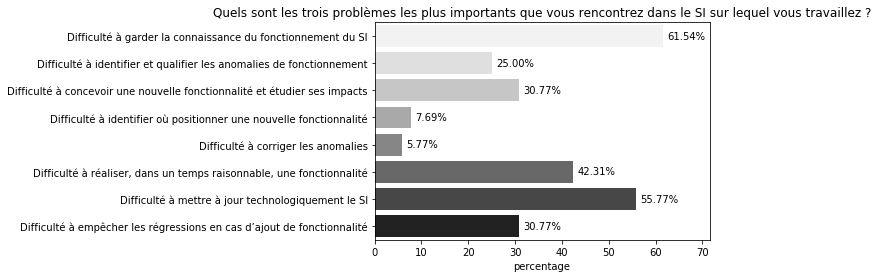

In [294]:
question = studied_data_set.columns[5]
major_problems_dataset = studied_data_set[question].dropna()
accounted_results_count = len(major_problems_dataset)
major_problems = with_percentage_respondants(flatten_results(major_problems_dataset), len(major_problems_dataset))

g = barplot_percentage(major_problems, question)